In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


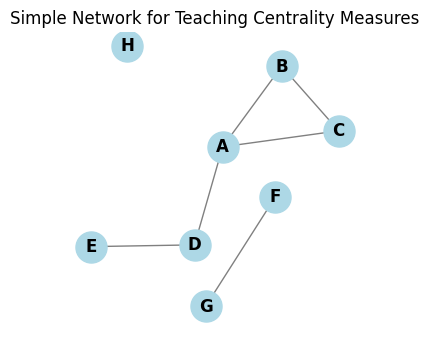

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes and edges to the graph
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('A', 'D'), ('D', 'E'), ('F', 'G')]
G.add_edges_from(edges)
G.add_node('H')

# Draw the graph with labels
pos = nx.spring_layout(G, seed=7, k=1.5)  # Decrease k value to make nodes closer
plt.figure(figsize=(3, 3))  # Increase figure size for better spacing
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title("Simple Network for Teaching Centrality Measures")
plt.savefig("graph_centrality.png")


In [46]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)  # Show full content of each column


centrality_df = pd.DataFrame({
    'Degree': nx.degree_centrality(G),
    'Closeness': nx.closeness_centrality(G),
    'Betweenness': nx.betweenness_centrality(G),
    'Eigenvector': nx.eigenvector_centrality(G),
    'Katz': nx.katz_centrality(G, alpha=0.1, beta=1.0),
    'PageRank': nx.pagerank(G),
    'Harmonic': nx.harmonic_centrality(G)}).round(2)
desc = [
    "number of connections", 
    "length of shortest path to all other nodes", 
    "how often is it on shortest path between other nodes", 
    "the more connected the connections of a node are, the more central it is",
    "like eigenvector, but with decaying factor for indirect connections",
    "like eigenvector, but with less bias toward highly connected clusters due to random jumps",
    "like closeness, but better suited for sparse graphs, because distant nodes still contribute to the centrality, but their influence is reduced smoothly"
]


desc_df = pd.DataFrame([desc], columns=centrality_df.columns)
centrality_df = pd.concat([desc_df, centrality_df.corr().mean().to_frame().T.round(2), centrality_df], ignore_index=True)
centrality_df.reset_index()
centrality_df.index = ["description", "mean correlation to other measures", "A", "B", "C", "D", "E", "F", "G", "H"]
centrality_df = centrality_df.T
centrality_df

,description,mean correlation to other measures,A,B,C,D,E,F,G,H
Degree,number of connections,0.91,0.43,0.29,0.29,0.29,0.14,0.14,0.14,0.0
Closeness,length of shortest path to all other nodes,0.89,0.46,0.33,0.33,0.38,0.25,0.14,0.14,0.0
Betweenness,how often is it on shortest path between other nodes,0.7,0.19,0.0,0.0,0.14,0.0,0.0,0.0,0.0
Eigenvector,"the more connected the connections of a node are, the more central it is",0.82,0.6,0.5,0.5,0.34,0.15,0.0,0.0,0.0
Katz,"like eigenvector, but with decaying factor for indirect connections",0.91,0.41,0.37,0.37,0.37,0.33,0.33,0.33,0.3
PageRank,"like eigenvector, but with less bias toward highly connected clusters due to random jumps",0.76,0.2,0.13,0.13,0.15,0.08,0.14,0.14,0.02
Harmonic,"like closeness, but better suited for sparse graphs, because distant nodes still contribute to the centrality, but their influence is reduced smoothly",0.87,3.5,2.83,2.83,3.0,2.17,1.0,1.0,0.0
